# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
print(api_key)

68ed5038481cc3b96a916bb0cc920d7a


## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
api_str = "http://api.openweathermap.org/data/2.5/weather?q="+cities[0]+"&APPID="+api_key
req = requests.get(api_str)
data = req.json()

In [13]:
print(req)
print(req.headers)

<Response [200]>
{'Server': 'openresty', 'Date': 'Fri, 24 Jan 2020 23:31:06 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Content-Length': '468', 'Connection': 'keep-alive', 'X-Cache-Key': '/data/2.5/weather?APPID=68ed5038481cc3b96a916bb0cc920d7a&q=okakarara', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true', 'Access-Control-Allow-Methods': 'GET, POST'}


In [17]:
print(data)
data['clouds']['all']

{'coord': {'lon': 17.43, 'lat': -20.58}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 293.86, 'feels_like': 295.26, 'temp_min': 293.86, 'temp_max': 293.86, 'pressure': 1013, 'humidity': 72, 'sea_level': 1013, 'grnd_level': 864}, 'wind': {'speed': 0.55, 'deg': 304}, 'clouds': {'all': 88}, 'dt': 1579908666, 'sys': {'country': 'NA', 'sunrise': 1579926517, 'sunset': 1579973758}, 'timezone': 7200, 'id': 3354876, 'name': 'Okakarara', 'cod': 200}


88

In [18]:
from collections import defaultdict
final_dict = defaultdict(list)

set_index = 1
rec_max = round(len(cities)/13)
rec_val = 1
print('Beginning Data Retrieval')
print('-----------------------------')
for ix, city in enumerate(cities):
    print('Processing Record {} of Set {}| {}'.format(rec_val, set_index, city))
    api_str = "http://api.openweathermap.org/data/2.5/weather?q="+city+"&APPID="+api_key
    req = requests.get(api_str)
    if req.status_code == 404:
        print('City not found. Skipping...')
        continue
    data = req.json()
    final_dict['City'].append(city)
    final_dict['Cloudiness'].append(data['clouds']['all'])
    final_dict['Country'].append(data['sys']['country'])
    final_dict['Date'].append(data['dt'])
    final_dict['Humidity'].append(data['main']['humidity'])
    final_dict['Lat'].append(data['coord']['lat'])
    final_dict['Lng'].append(data['coord']['lon'])
    final_dict['Max Temp'].append(data['main']['temp_max'])
    final_dict['Wind Speed'].append(data['wind']['speed'])
    rec_val += 1
    if rec_val >= 49:
        set_index += 1
        rec_val = 1
        time.sleep(10)

    
print('-----------------------------')
print('Data Retrieval Complete')      
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1| okakarara
Processing Record 2 of Set 1| clyde river
Processing Record 3 of Set 1| kushima
Processing Record 4 of Set 1| tabas
Processing Record 5 of Set 1| xining
Processing Record 6 of Set 1| norman wells
Processing Record 7 of Set 1| buala
Processing Record 8 of Set 1| ushuaia
Processing Record 9 of Set 1| mataura
Processing Record 10 of Set 1| tuatapere
Processing Record 11 of Set 1| bengkulu
Processing Record 12 of Set 1| vaini
Processing Record 13 of Set 1| saint-augustin
Processing Record 14 of Set 1| taolanaro
City not found. Skipping...
Processing Record 14 of Set 1| port alfred
Processing Record 15 of Set 1| bengkalis
City not found. Skipping...
Processing Record 15 of Set 1| kapaa
Processing Record 16 of Set 1| puerto ayora
Processing Record 17 of Set 1| hobart
Processing Record 18 of Set 1| lithakia
Processing Record 19 of Set 1| kholmogory
Processing Record 20 of Set 1| talnakh
Processing R

Processing Record 31 of Set 4| kodiak
Processing Record 32 of Set 4| ahipara
Processing Record 33 of Set 4| manggar
Processing Record 34 of Set 4| cabo san lucas
Processing Record 35 of Set 4| cuenca
Processing Record 36 of Set 4| coihaique
Processing Record 37 of Set 4| acarau
Processing Record 38 of Set 4| mitchell
Processing Record 39 of Set 4| te anau
Processing Record 40 of Set 4| carpinteria
Processing Record 41 of Set 4| monze
Processing Record 42 of Set 4| derzhavinsk
Processing Record 43 of Set 4| torbay
Processing Record 44 of Set 4| ushtobe
Processing Record 45 of Set 4| ossora
Processing Record 46 of Set 4| salmon creek
Processing Record 47 of Set 4| myitkyina
Processing Record 48 of Set 4| flin flon
Processing Record 1 of Set 5| makaha
Processing Record 2 of Set 5| shupiyan
Processing Record 3 of Set 5| sioux lookout
Processing Record 4 of Set 5| nizhniy tsasuchey
Processing Record 5 of Set 5| san cristobal
Processing Record 6 of Set 5| bilibino
Processing Record 7 of Set 

Processing Record 18 of Set 8| lagoa
Processing Record 19 of Set 8| saint-pierre
Processing Record 20 of Set 8| jian
Processing Record 21 of Set 8| saint anthony
Processing Record 22 of Set 8| sabinas
Processing Record 23 of Set 8| thinadhoo
Processing Record 24 of Set 8| nikolskoye
Processing Record 25 of Set 8| nazare
Processing Record 26 of Set 8| birin
Processing Record 27 of Set 8| cockburn harbour
City not found. Skipping...
Processing Record 27 of Set 8| noyemberyan
Processing Record 28 of Set 8| palabuhanratu
City not found. Skipping...
Processing Record 28 of Set 8| sao geraldo do araguaia
Processing Record 29 of Set 8| la spezia
Processing Record 30 of Set 8| northam
Processing Record 31 of Set 8| arlit
Processing Record 32 of Set 8| hit
Processing Record 33 of Set 8| abu samrah
Processing Record 34 of Set 8| palmer
Processing Record 35 of Set 8| rafraf
Processing Record 36 of Set 8| jiazi
Processing Record 37 of Set 8| lorengau
Processing Record 38 of Set 8| guatire
Processi

Processing Record 6 of Set 12| sorkjosen
Processing Record 7 of Set 12| le francois
Processing Record 8 of Set 12| tyukhtet
Processing Record 9 of Set 12| takoradi
Processing Record 10 of Set 12| southbridge
Processing Record 11 of Set 12| nouadhibou
Processing Record 12 of Set 12| altay
Processing Record 13 of Set 12| pochutla
Processing Record 14 of Set 12| pljevlja
Processing Record 15 of Set 12| takanabe
Processing Record 16 of Set 12| villazon
Processing Record 17 of Set 12| camana
Processing Record 18 of Set 12| sfantu gheorghe
Processing Record 19 of Set 12| sola
Processing Record 20 of Set 12| maceio
Processing Record 21 of Set 12| fort nelson
Processing Record 22 of Set 12| kapit
Processing Record 23 of Set 12| duncan
Processing Record 24 of Set 12| vila franca do campo
Processing Record 25 of Set 12| kandalaksha
Processing Record 26 of Set 12| san jose
Processing Record 27 of Set 12| jiddah
City not found. Skipping...
Processing Record 27 of Set 12| oranjestad
Processing Reco

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
city_weather = pd.DataFrame(final_dict)

In [24]:
city_weather.count()

City          580
Cloudiness    580
Country       580
Date          580
Humidity      580
Lat           580
Lng           580
Max Temp      580
Wind Speed    580
dtype: int64

In [27]:
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,okakarara,88,NA,1579910760,72,-20.58,17.43,293.86,0.55
1,clyde river,5,CA,1579910760,68,70.47,-68.59,246.15,3.10
2,kushima,75,JP,1579910761,87,31.46,131.23,285.15,6.20
3,tabas,0,IR,1579910761,50,33.60,56.92,277.15,2.10
4,xining,24,CN,1579910677,84,36.62,101.77,261.23,2.00


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [31]:
y = 6
f = y**2

print(f)

36


In [33]:
f = lambda y:(y * 9/5) + 32
f(10)

50.0

In [39]:
city_weather['Max Temp'] = city_weather['Max Temp'].apply(lambda x: (x-273.15)*(9/5)+32).round(decimals=2)
city_weather['Wind Speed'] = city_weather['Wind Speed'].apply(lambda y: (y * 2.23694)).round(decimals=2)
city_weather

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,okakarara,88,NA,1579910760,72,-20.58,17.43,-4729.97,6.15
1,clyde river,5,CA,1579910760,68,70.47,-68.59,-5631.47,34.67
2,kushima,75,JP,1579910761,87,31.46,131.23,-4894.53,69.41
3,tabas,0,IR,1579910761,50,33.60,56.92,-5045.71,23.51
4,xining,24,CN,1579910677,84,36.62,101.77,-5346.56,22.37
...,...,...,...,...,...,...,...,...,...
575,galveston,1,US,1579910971,53,29.37,-94.97,-4762.26,26.17
576,doha,0,QA,1579910922,67,25.29,51.53,-4837.86,34.67
577,seymchan,81,RU,1579910981,94,62.88,152.43,-5822.82,22.17
578,alekseyevsk,100,RU,1579910982,93,57.84,108.35,-5292.11,58.21


#### Latitude vs. Temperature Plot

In [41]:
from datetime import date
today = date.today()

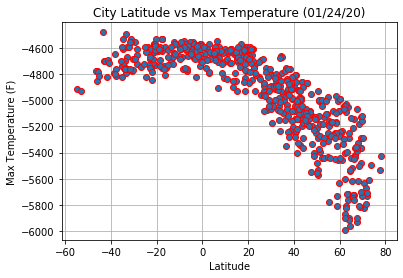

In [64]:
plt.plot(city_weather['Lat'], city_weather['Max Temp'], 'o', mec='r')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature ({})'.format(today.strftime("%m/%d/%y")));

#### Latitude vs. Humidity Plot

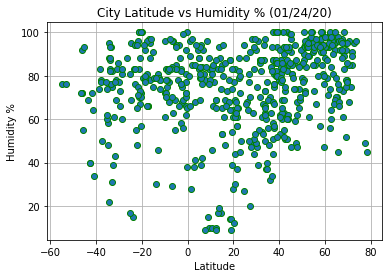

In [61]:
plt.plot(city_weather['Lat'], city_weather['Humidity'], 'o', mec='g')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Latitude vs Humidity % ({})'.format(today.strftime("%m/%d/%y")));

#### Latitude vs. Cloudiness Plot

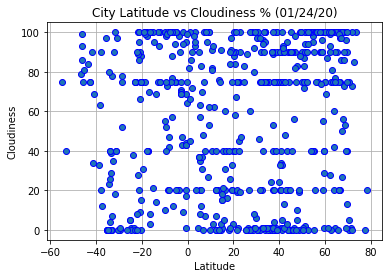

In [62]:
plt.plot(city_weather['Lat'], city_weather['Cloudiness'], 'o', mec='b')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness % ({})'.format(today.strftime("%m/%d/%y")));

#### Latitude vs. Wind Speed Plot

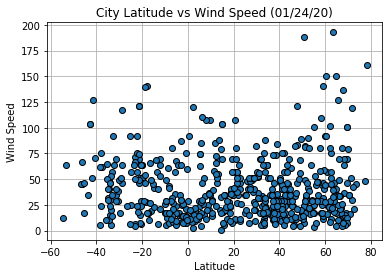

In [67]:
plt.plot(city_weather['Lat'], city_weather['Wind Speed'], 'o', mec='0000')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Wind Speed ({})'.format(today.strftime("%m/%d/%y")));